# Iris flower Segmentation with Cluster Analysis 

In [90]:
## import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [91]:
data = pd.read_csv('iris_dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [92]:
## Check if there are any missing Values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

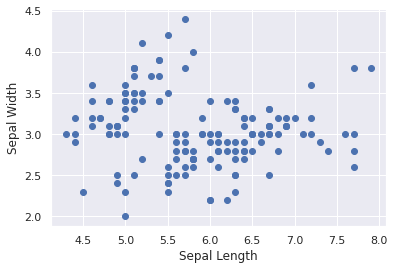

In [93]:
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [94]:
## Clustering (Initialize)
x = data.copy()
kmeans = KMeans(6)
kmeans.fit(x)

KMeans(n_clusters=6)

In [95]:
## Predict the cluster
cluster = data.copy()
cluster['Clustering'] = kmeans.fit_predict(x)
cluster

,sepal_length,sepal_width,petal_length,petal_width,Clustering
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,5
2,4.7,3.2,1.3,0.2,5
3,4.6,3.1,1.5,0.2,5
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


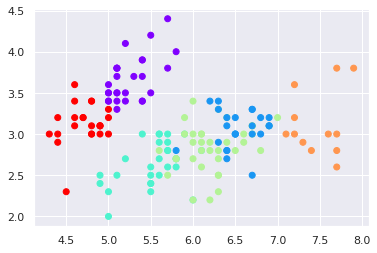

In [96]:
plt.scatter(cluster['sepal_length'], cluster['sepal_width'], c = cluster['Clustering'], cmap = 'rainbow')

In [49]:
## Scale the features 
from sklearn import preprocessing
x_scale = preprocessing.scale(data)
x_scale

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [97]:
## Clustering with scaled data
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scale)

KMeans(n_clusters=2)

In [99]:
cluster_scale = data.copy()
cluster_scale['Predicted_scaled_cluster'] = kmeans_scaled.fit_predict(x_scale)
cluster_scale

,sepal_length,sepal_width,petal_length,petal_width,Predicted_scaled_cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


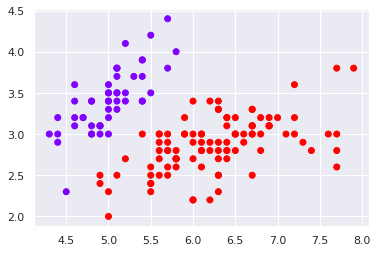

In [100]:
plt.scatter(cluster_scale['sepal_length'], cluster_scale['sepal_width'], c =cluster_scale['Predicted_scaled_cluster'], cmap ='rainbow')

In [101]:
## Creating a function with KMeans to plot "The Elbow Curve"
wcss= []
number_clustering = 10
for i in range (1, number_clustering):
    kmeans = KMeans(i)
    kmeans.fit(x_scale)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [102]:
wcss

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.42714544645858,
 91.19197002146461,
 80.18539211415839,
 70.9587590382698,
 62.81942361630578,
 55.854172370722594]

<function matplotlib.pyplot.show>

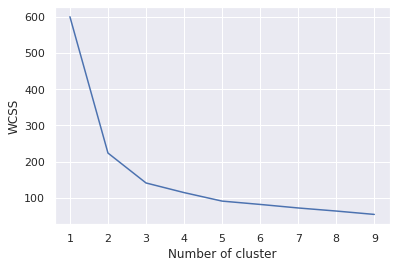

In [74]:
plt.plot(range(1,10) , wcss)
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show

In [103]:
## For number of cluster 2,3,5 we will compaire the scatter plot
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scale)
cluster_2 = data.copy()
cluster_2['Predict-cluster2'] = kmeans_2.fit_predict(x_scale)
cluster_2

,sepal_length,sepal_width,petal_length,petal_width,Predict-cluster2
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


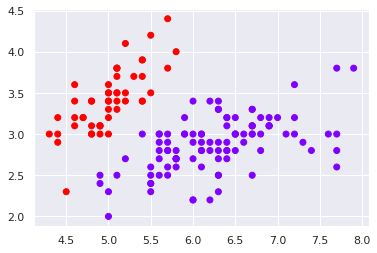

In [104]:
plt.scatter(cluster_2['sepal_length'], cluster_2['sepal_width'], c = cluster_2['Predict-cluster2'], cmap = 'rainbow')

In [105]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scale)
clustering_3 = data.copy()
clustering_3['Predict_cluster_3'] = kmeans_3.fit_predict(x_scale)
clustering_3

,sepal_length,sepal_width,petal_length,petal_width,Predict_cluster_3
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


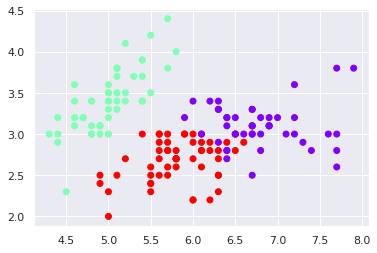

In [106]:
plt.scatter(clustering_3['sepal_length'], clustering_3['sepal_width'], c= clustering_3['Predict_cluster_3'] , cmap ='rainbow' )

In [107]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scale)
clustering_5 = data.copy()
clustering_5['Predict_cluster_5'] = kmeans_5.fit_predict(x_scale)
clustering_5

,sepal_length,sepal_width,petal_length,petal_width,Predict_cluster_5
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,3
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,4
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


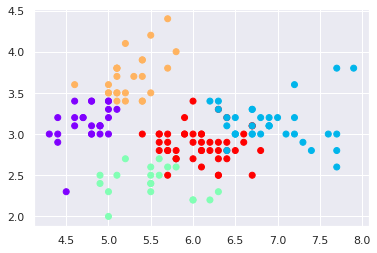

In [108]:
plt.scatter(clustering_5['sepal_length'], clustering_5['sepal_width'], c= clustering_5['Predict_cluster_5'] , cmap ='rainbow' )

In [109]:
## It seems cluster number 5 is better, but in reality the Iris species devided by 3.